# Практическая работа №1



In [46]:
import pandas as pd
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import sklearn 
from collections import Counter
from sklearn.impute import KNNImputer

## Визуальный анализ данных

In [2]:
file = 'first_practice_dataframe.xlsx'
xl = pd.read_excel(file)
df = xl[["cat1_gender", "cat12_blood type", "num1_13", "num2_13", "num3_13"]]
del(xl)

In [3]:
# выведем 5 первых строк полученного dataframe
df.head()

cat1_gender cat12_blood type      num1_13     num2_13     num3_13
0        male               IV   468.255018  751.973036   687.41424
1        male               ii  1054.708579  496.162268  822.874808
2        male                I   670.800326  713.342702  606.686699
3         NaN                I   600.369097  718.737459  752.979488
4        male               ii   116.929405  965.503008  796.338403

In [4]:
# получим необходимый столбец для визуального анализа и просмотрим имеющиеся в нем данные 
gender = df["cat1_gender"].value_counts()
gender

male      633
Male      156
female    126
Female     28
-          20
           19
Name: cat1_gender, dtype: int64

In [5]:
# получим необходимый столбец для визуального анализа и просмотрим имеющиеся в нем данные 
blood_type = df["cat12_blood type"].value_counts()
blood_type

II     422
III    245
I      173
ii      81
-       20
        20
IV      17
iv       2
Name: cat12_blood type, dtype: int64

### Круговые диаграммы 

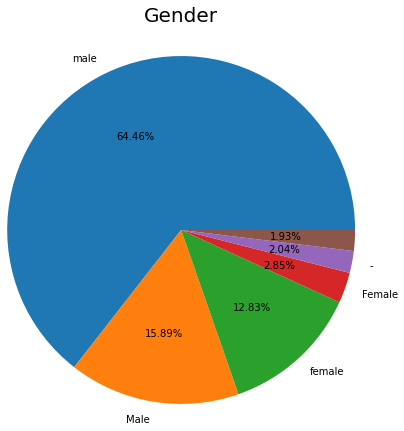

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie(gender.values, labels=gender.index, autopct='%1.2f%%', radius=2)
plt.title("Gender", size=20, pad=100)
plt.show()

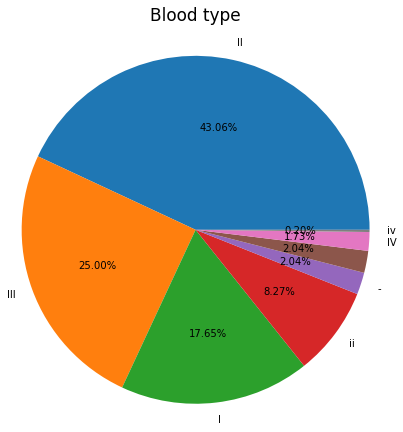

In [7]:
fig2, ax2 = plt.subplots()
ax2.pie(blood_type.values, labels=blood_type.index,
        autopct='%1.2f%%', radius=2)
plt.title("Blood type", size=17, pad=100)
plt.show()

### Столбчатые диаграммы 

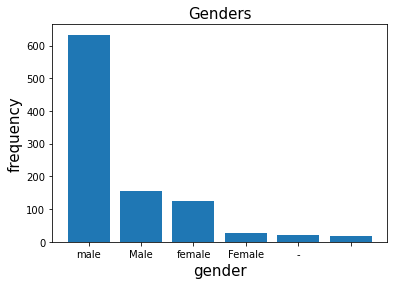

In [8]:
fig3, ax3 = plt.subplots()
ax3 = plt.bar(gender.index, gender.values)
plt.title("Genders", size=15)
plt.xlabel("gender", size=15)
plt.ylabel("frequency", size=15)
plt.show()

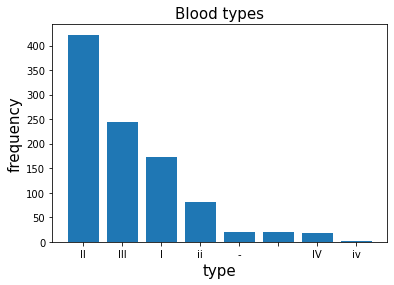

In [9]:
fig4, ax4 = plt.subplots()
ax4 = plt.bar(blood_type.index, blood_type.values)
plt.title("Blood types", size=15)
plt.xlabel("type", size=15)
plt.ylabel("frequency", size=15)
plt.show()

### Гистограммы

In [10]:
def clean_none(col : pd.core.series) -> pd.core.series :
    """Функция для удаления пропусков
    :param col : колонка с данными 
    """
    col = col.replace({" ": None})
    col = col.replace({"-": None})
    return col

<AxesSubplot:xlabel='num1_13', ylabel='Count'>

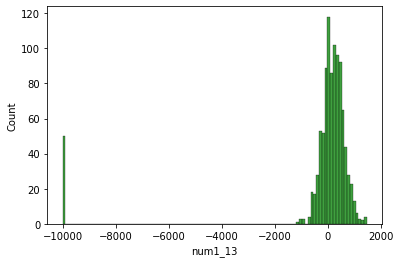

In [11]:
sns.histplot(df.num1_13, kde=False, color="green")

<AxesSubplot:xlabel='num2_13', ylabel='Count'>

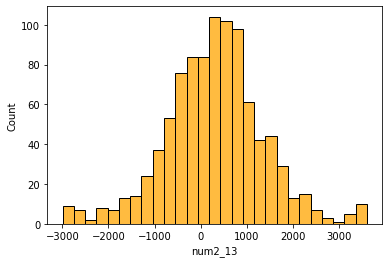

In [12]:
sns.histplot(df.num2_13, kde=False, color="orange")

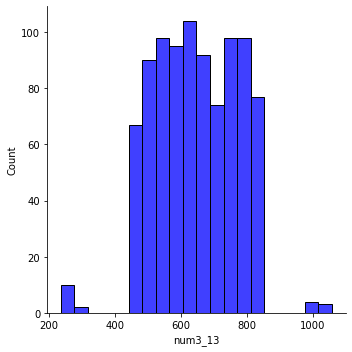

In [13]:
df["num3_13"] = clean_none(df["num3_13"])
sns.displot(df.num3_13, kde=False, color="b")

### Плотность распределения 

<AxesSubplot:ylabel='Density'>

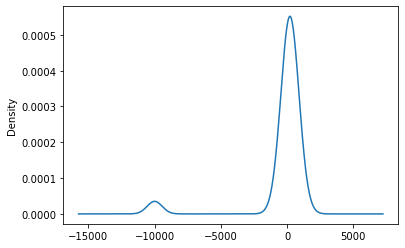

In [14]:
series1_13 = pd.Series(df.num1_13)
series1_13.plot.kde()

<AxesSubplot:ylabel='Density'>

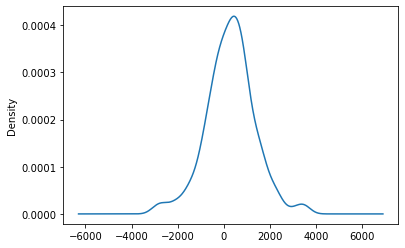

In [15]:
series2_13 = pd.Series(df.num2_13)
series2_13.plot.kde()

<AxesSubplot:ylabel='Density'>

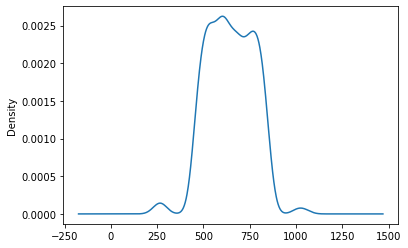

In [16]:
series3_13 = pd.Series(df.num3_13)
series3_13.plot.kde()

### Диаграмма разброса (ящик с усами)

In [17]:
def mustache(col : pd.core.series) -> None:
    """Функция для построения диаграммы разброса
    :param col : колонка с данными
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    col.plot(kind='box')
    plt.show()

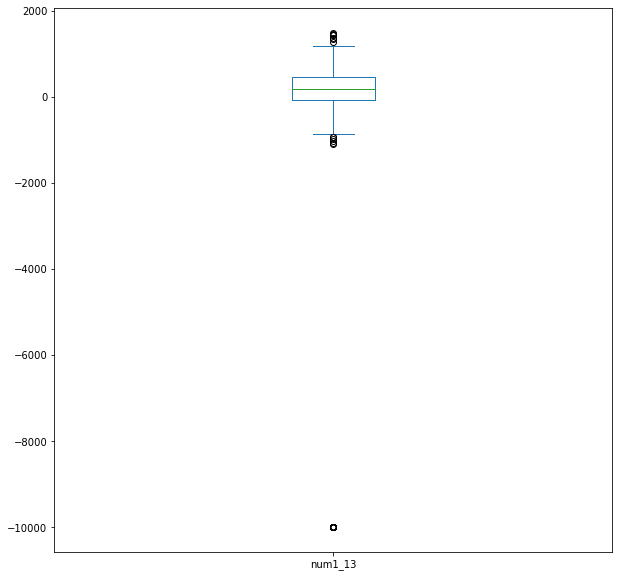

In [18]:
mustache(df['num1_13'])

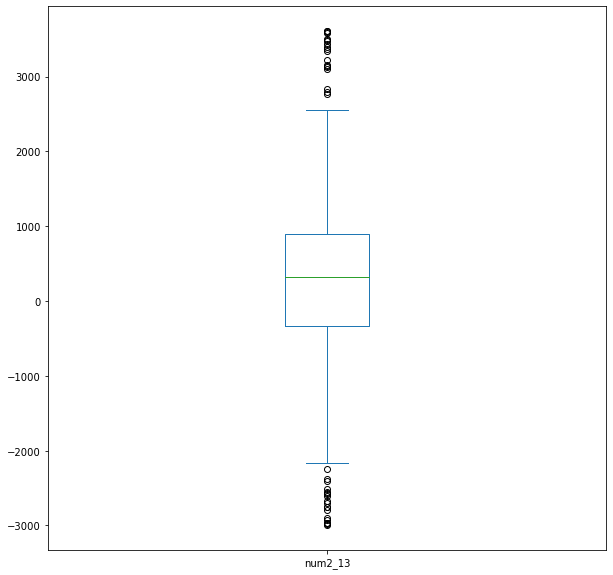

In [19]:
mustache(df['num2_13'])

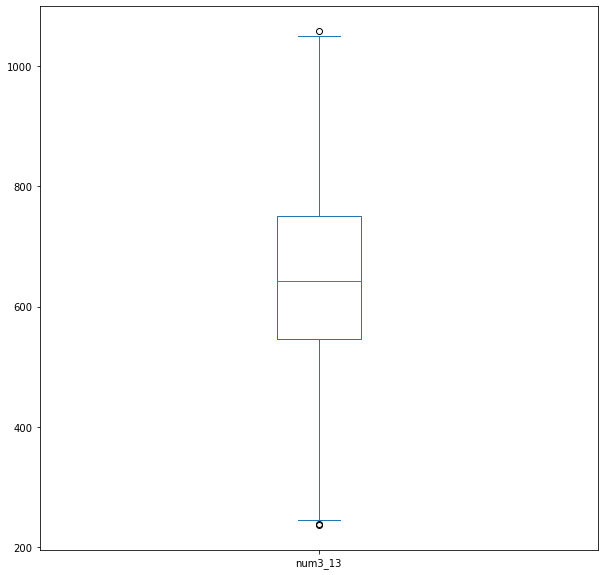

In [20]:
mustache(df['num3_13'])

## Проверка правдоподобности исходных данных

In [21]:
# Изменим тип данных на категориальный
df['cat1_gender'] = df['cat1_gender'].astype('category') 
df['cat12_blood type'] = df['cat12_blood type'].astype('category') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cat1_gender       982 non-null    category
 1   cat12_blood type  980 non-null    category
 2   num1_13           1000 non-null   float64 
 3   num2_13           952 non-null    float64 
 4   num3_13           912 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 26.1 KB


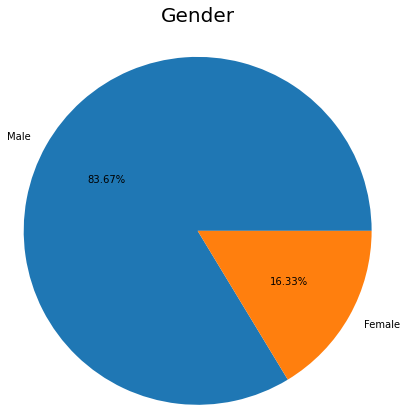

In [22]:
# Преобразуем данные, удалим пропуски и приведем название полов к одному виду 
df["cat1_gender"] = clean_none(df["cat1_gender"])
df['cat1_gender'] = df['cat1_gender'].replace({-9999: None}) 
df["cat1_gender"] = df["cat1_gender"].replace({"male": "Male"})
df["cat1_gender"] = df["cat1_gender"].replace({"female": "Female"})
gender = df["cat1_gender"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(gender.values, labels=gender.index, autopct='%1.2f%%', radius=2)
plt.title("Gender", size=20, pad=100)
plt.show()

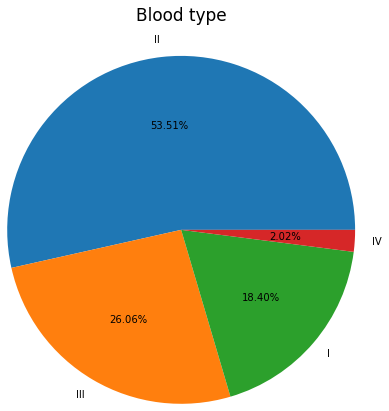

In [23]:
# Преобразуем данные, удалим пропуски и приведем названия групп крови к одному виду 
df["cat12_blood type"] = clean_none(df["cat12_blood type"])
df["cat12_blood type"] = df["cat12_blood type"].replace({-9999: None}) 
df["cat12_blood type"] = df["cat12_blood type"].replace({"ii": "II"})
df["cat12_blood type"] = df["cat12_blood type"].replace({"iv": "IV"})
blood_type = df["cat12_blood type"].value_counts()
fig2, ax2 = plt.subplots()
ax2.pie(blood_type.values, labels=blood_type.index,
        autopct='%1.2f%%', radius=2)
plt.title("Blood type", size=17, pad=100)
plt.show()

## Поиск аномальных значений

### Метод квантилей

In [24]:
def method_quants(col: pd.core.series, threshold: float=1.5) -> None:
    """ Функция реализующая поиск аномальных значений методом квантидей
    :param col       : колонка с данными
    :param threshold : значение порога
    """
    IQR = col.quantile(0.75) - col.quantile(0.25)
    high = col.quantile(0.75) + (IQR * threshold)
    low = col.quantile(0.25) - (IQR * threshold)
    df_q = col[(col > low) & (col < high)]
    mustache(df_q)

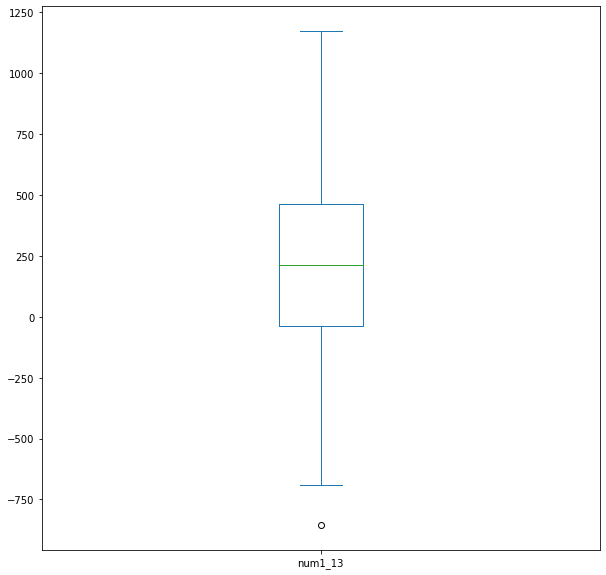

In [25]:
method_quants(df['num1_13'].dropna())

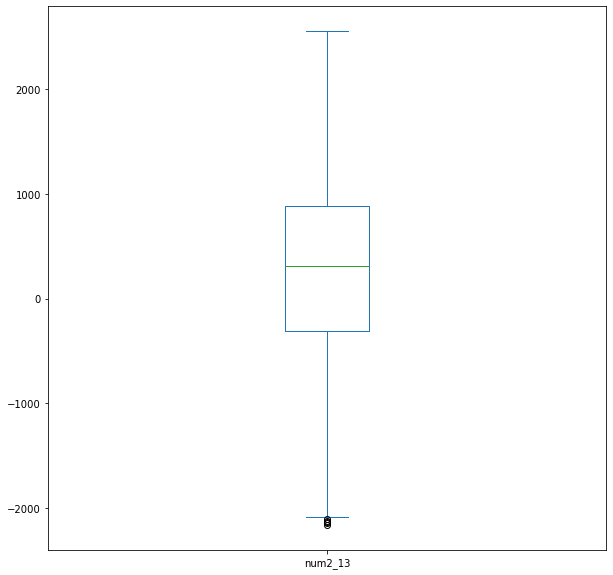

In [26]:
method_quants(df['num2_13'].dropna())

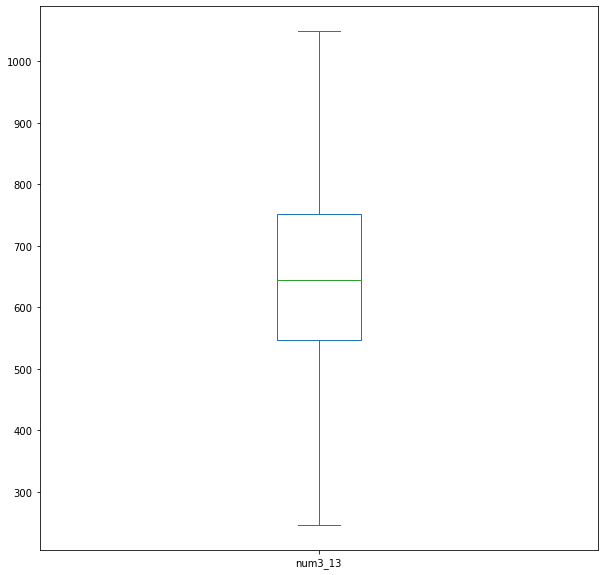

In [27]:
method_quants(df['num3_13'].dropna())

### Метод сигм

In [28]:
def method_sigms(col: pd.core.series):
    """ Функция реализующая поиск аномальных значений методом сигм
    :param col : колонка с данными
    """
    a, l, h = sc.stats.sigmaclip(df[col].dropna(), low=3, high=3)
    df.drop(df.index[(df[col] <l) | (df[col]> h)], inplace = True)
    mustache(df[col])
    return df

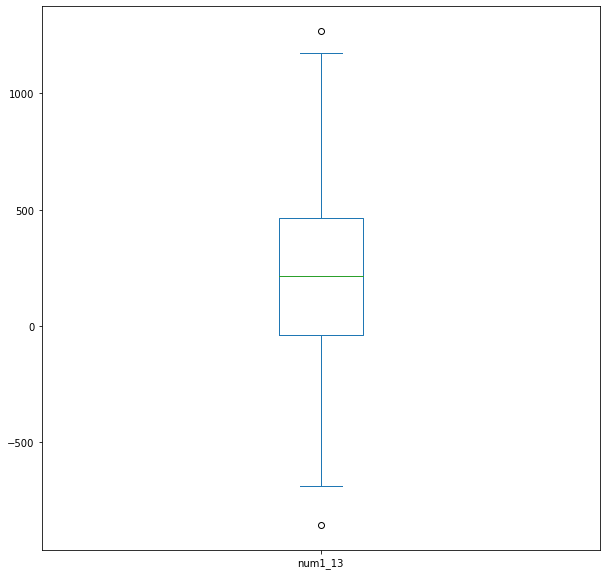

cat1_gender cat12_blood type      num1_13      num2_13     num3_13
0          Male               IV   468.255018   751.973036  687.414240
1          Male               II  1054.708579   496.162268  822.874808
2          Male                I   670.800326   713.342702  606.686699
3           NaN                I   600.369097   718.737459  752.979488
4          Male               II   116.929405   965.503008  796.338403
..          ...              ...          ...          ...         ...
995        Male               II   425.991978  -750.192818  591.314586
996        Male              III   140.511520   143.635827  524.391900
997        Male              III  -190.975198 -1496.036676  530.951783
998         NaN               II   591.226740 -1204.809581  664.605547
999        Male                I   422.361016  -735.370806  494.358952

[938 rows x 5 columns]

In [30]:
method_sigms('num1_13')

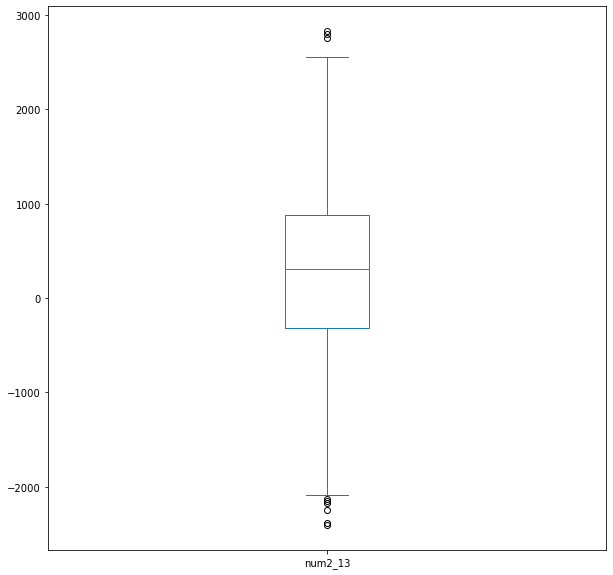

cat1_gender cat12_blood type      num1_13      num2_13     num3_13
0          Male               IV   468.255018   751.973036  687.414240
1          Male               II  1054.708579   496.162268  822.874808
2          Male                I   670.800326   713.342702  606.686699
3           NaN                I   600.369097   718.737459  752.979488
4          Male               II   116.929405   965.503008  796.338403
..          ...              ...          ...          ...         ...
995        Male               II   425.991978  -750.192818  591.314586
996        Male              III   140.511520   143.635827  524.391900
997        Male              III  -190.975198 -1496.036676  530.951783
998         NaN               II   591.226740 -1204.809581  664.605547
999        Male                I   422.361016  -735.370806  494.358952

[910 rows x 5 columns]

In [32]:
method_sigms('num2_13')

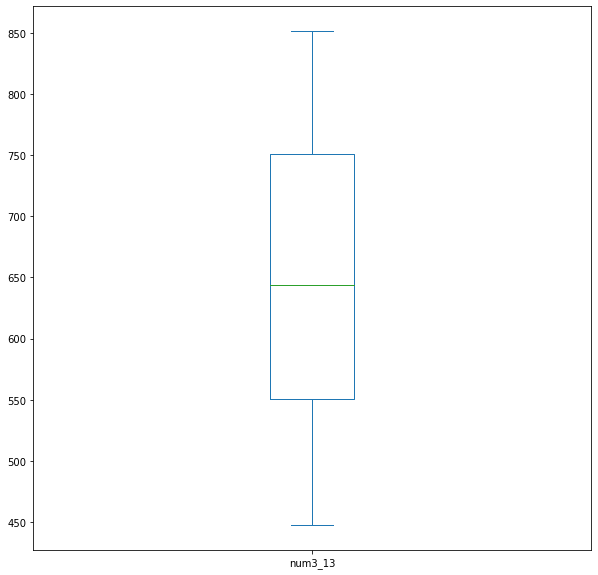

cat1_gender cat12_blood type      num1_13      num2_13     num3_13
0          Male               IV   468.255018   751.973036  687.414240
1          Male               II  1054.708579   496.162268  822.874808
2          Male                I   670.800326   713.342702  606.686699
3           NaN                I   600.369097   718.737459  752.979488
4          Male               II   116.929405   965.503008  796.338403
..          ...              ...          ...          ...         ...
995        Male               II   425.991978  -750.192818  591.314586
996        Male              III   140.511520   143.635827  524.391900
997        Male              III  -190.975198 -1496.036676  530.951783
998         NaN               II   591.226740 -1204.809581  664.605547
999        Male                I   422.361016  -735.370806  494.358952

[891 rows x 5 columns]

In [33]:
method_sigms('num3_13')

In [34]:
# переиндексация
df = df.reset_index(drop=True)
df

cat1_gender cat12_blood type      num1_13      num2_13     num3_13
0          Male               IV   468.255018   751.973036  687.414240
1          Male               II  1054.708579   496.162268  822.874808
2          Male                I   670.800326   713.342702  606.686699
3           NaN                I   600.369097   718.737459  752.979488
4          Male               II   116.929405   965.503008  796.338403
..          ...              ...          ...          ...         ...
886        Male               II   425.991978  -750.192818  591.314586
887        Male              III   140.511520   143.635827  524.391900
888        Male              III  -190.975198 -1496.036676  530.951783
889         NaN               II   591.226740 -1204.809581  664.605547
890        Male                I   422.361016  -735.370806  494.358952

[891 rows x 5 columns]

##  Поиск и восстановление пропущенных значений

### Метод k ближайщих соседей 

In [35]:
# применим OneHotEncoder 
df['cat1_gender'] = df['cat1_gender'].replace({np.nan: 'nana'}) 
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['cat1_gender']]).toarray())
df = df.join(enc_df)

In [36]:
df['cat1_gender'] = df['cat1_gender'].replace({'nana': np.nan})
df

cat1_gender cat12_blood type      num1_13      num2_13     num3_13    0  \
0          Male               IV   468.255018   751.973036  687.414240  0.0   
1          Male               II  1054.708579   496.162268  822.874808  0.0   
2          Male                I   670.800326   713.342702  606.686699  0.0   
3           NaN                I   600.369097   718.737459  752.979488  0.0   
4          Male               II   116.929405   965.503008  796.338403  0.0   
..          ...              ...          ...          ...         ...  ...   
886        Male               II   425.991978  -750.192818  591.314586  0.0   
887        Male              III   140.511520   143.635827  524.391900  0.0   
888        Male              III  -190.975198 -1496.036676  530.951783  0.0   
889         NaN               II   591.226740 -1204.809581  664.605547  0.0   
890        Male                I   422.361016  -735.370806  494.358952  0.0   

       1    2  
0    1.0  0.0  
1    1.0  0.0  
2    1.0  0.0  
3    0.0  1.0  
4    1.0  0.0  
..   ...  ...  
886  1.0  0.0  
887  1.0  0.0  
888  1.0  0.0  
889  0.0  1.0  
890  1.0  0.0  

[891 rows x 8 columns]

In [37]:
idx = df.groupby([2]).indices[1]
df[0] = pd.DataFrame(np.where(df[0].index.isin(idx), np.nan, df[0]))
df[1] = pd.DataFrame(np.where(df[1].index.isin(idx), np.nan, df[1]))

In [38]:
knn_imputer = KNNImputer()
inputed_df = pd.DataFrame(knn_imputer.fit_transform(df.iloc[:,2:-1]), columns=df.columns[2:-1])
df[0] = inputed_df[0]
df[1] = inputed_df[1]
df

cat1_gender cat12_blood type      num1_13      num2_13     num3_13    0  \
0          Male               IV   468.255018   751.973036  687.414240  0.0   
1          Male               II  1054.708579   496.162268  822.874808  0.0   
2          Male                I   670.800326   713.342702  606.686699  0.0   
3           NaN                I   600.369097   718.737459  752.979488  0.0   
4          Male               II   116.929405   965.503008  796.338403  0.0   
..          ...              ...          ...          ...         ...  ...   
886        Male               II   425.991978  -750.192818  591.314586  0.0   
887        Male              III   140.511520   143.635827  524.391900  0.0   
888        Male              III  -190.975198 -1496.036676  530.951783  0.0   
889         NaN               II   591.226740 -1204.809581  664.605547  0.2   
890        Male                I   422.361016  -735.370806  494.358952  0.0   

       1    2  
0    1.0  0.0  
1    1.0  0.0  
2    1.0  0.0  
3    1.0  1.0  
4    1.0  0.0  
..   ...  ...  
886  1.0  0.0  
887  1.0  0.0  
888  1.0  0.0  
889  0.8  1.0  
890  1.0  0.0  

[891 rows x 8 columns]

In [39]:
#df = df.round({0:0, 1:0}) # 1- максимальное число, 0 - все остальные
df[2] = 0

In [40]:
#удаляем созданные столбцы 
df['cat1_gender'] = enc.inverse_transform(df[[0, 1, 2]])
df = df.drop([2], 1)
df

C:\Temp/ipykernel_18916/1134497139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop([2], 1)


cat1_gender cat12_blood type      num1_13      num2_13     num3_13    0  \
0          Male               IV   468.255018   751.973036  687.414240  0.0   
1          Male               II  1054.708579   496.162268  822.874808  0.0   
2          Male                I   670.800326   713.342702  606.686699  0.0   
3          Male                I   600.369097   718.737459  752.979488  0.0   
4          Male               II   116.929405   965.503008  796.338403  0.0   
..          ...              ...          ...          ...         ...  ...   
886        Male               II   425.991978  -750.192818  591.314586  0.0   
887        Male              III   140.511520   143.635827  524.391900  0.0   
888        Male              III  -190.975198 -1496.036676  530.951783  0.0   
889        Male               II   591.226740 -1204.809581  664.605547  0.2   
890        Male                I   422.361016  -735.370806  494.358952  0.0   

       1  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
..   ...  
886  1.0  
887  1.0  
888  1.0  
889  0.8  
890  1.0  

[891 rows x 7 columns]

### Замена пропущенных значений во 2 столбце самым популярным значением

In [41]:
data = Counter(df['cat12_blood type'].dropna())
mode = data.most_common(1)[0][0]
df['cat12_blood type'].fillna(mode, inplace=True)
df

cat1_gender cat12_blood type      num1_13      num2_13     num3_13    0  \
0          Male               IV   468.255018   751.973036  687.414240  0.0   
1          Male               II  1054.708579   496.162268  822.874808  0.0   
2          Male                I   670.800326   713.342702  606.686699  0.0   
3          Male                I   600.369097   718.737459  752.979488  0.0   
4          Male               II   116.929405   965.503008  796.338403  0.0   
..          ...              ...          ...          ...         ...  ...   
886        Male               II   425.991978  -750.192818  591.314586  0.0   
887        Male              III   140.511520   143.635827  524.391900  0.0   
888        Male              III  -190.975198 -1496.036676  530.951783  0.0   
889        Male               II   591.226740 -1204.809581  664.605547  0.2   
890        Male                I   422.361016  -735.370806  494.358952  0.0   

       1  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
..   ...  
886  1.0  
887  1.0  
888  1.0  
889  0.8  
890  1.0  

[891 rows x 7 columns]

### Заполнение пропусков в 3 столбце средним значением

In [42]:
df['num1_13'].fillna(np.std(df['num1_13'].dropna()), inplace=True)

### Заполнение пропусков в 4 столбце медианой

In [43]:
df['num2_13'].fillna(np.median(df['num2_13'].dropna()), inplace=True)

### Заполнение пропусков в 5 столбце методом "k-ближайших соседей"

In [44]:
df_copy = df.copy()         
knn_imputer = KNNImputer()
inputed_df = knn_imputer.fit_transform(df_copy[['num3_13', 'num2_13']])
df['num3_13'] = inputed_df[:, 0] # заполняем колонку num3_13
df 

cat1_gender cat12_blood type      num1_13      num2_13     num3_13    0  \
0          Male               IV   468.255018   751.973036  687.414240  0.0   
1          Male               II  1054.708579   496.162268  822.874808  0.0   
2          Male                I   670.800326   713.342702  606.686699  0.0   
3          Male                I   600.369097   718.737459  752.979488  0.0   
4          Male               II   116.929405   965.503008  796.338403  0.0   
..          ...              ...          ...          ...         ...  ...   
886        Male               II   425.991978  -750.192818  591.314586  0.0   
887        Male              III   140.511520   143.635827  524.391900  0.0   
888        Male              III  -190.975198 -1496.036676  530.951783  0.0   
889        Male               II   591.226740 -1204.809581  664.605547  0.2   
890        Male                I   422.361016  -735.370806  494.358952  0.0   

       1  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
..   ...  
886  1.0  
887  1.0  
888  1.0  
889  0.8  
890  1.0  

[891 rows x 7 columns]

## Преобразование данных

### Для количественных переменных (нормализация и стардартизация)

In [47]:
df[['num1_13', 'num2_13', 'num3_13']] = sklearn.preprocessing.scale(df[['num1_13', 'num2_13', 'num3_13']]) # стандартизация 
df 

cat1_gender cat12_blood type   num1_13   num2_13   num3_13    0    1
0          Male               IV  0.675004  0.515839  0.349297  0.0  1.0
1          Male               II  2.259368  0.227998  1.581901  0.0  1.0
2          Male                I  1.222201  0.472372 -0.385272  0.0  1.0
3          Male                I  1.031924  0.478442  0.945899  0.0  1.0
4          Male               II -0.274137  0.756105  1.340437  0.0  1.0
..          ...              ...       ...       ...       ...  ...  ...
886        Male               II  0.560827 -1.174412 -0.525149  0.0  1.0
887        Male              III -0.210428 -0.168668 -1.134102  0.0  1.0
888        Male              III -1.105973 -2.013643 -1.074411  0.0  1.0
889        Male               II  1.007225 -1.685951  0.141752  0.2  0.8
890        Male                I  0.551017 -1.157734 -1.407383  0.0  1.0

[891 rows x 7 columns]

#### Нормализация

In [48]:
df[['num1_13', 'num2_13', 'num3_13']] = pd.DataFrame(sklearn.preprocessing.MinMaxScaler().fit_transform(df[['num1_13', 'num2_13', 'num3_13']]))
df 

cat1_gender cat12_blood type   num1_13   num2_13   num3_13    0    1
0          Male               IV  0.591174  0.602974  0.593773  0.0  1.0
1          Male               II  0.890877  0.554138  0.928728  0.0  1.0
2          Male                I  0.694683  0.595599  0.394157  0.0  1.0
3          Male                I  0.658690  0.596629  0.755897  0.0  1.0
4          Male               II  0.411632  0.643737  0.863111  0.0  1.0
..          ...              ...       ...       ...       ...  ...  ...
886        Male               II  0.569576  0.316203  0.356146  0.0  1.0
887        Male              III  0.423683  0.486839  0.190665  0.0  1.0
888        Male              III  0.254279  0.173818  0.206886  0.0  1.0
889        Male               II  0.654018  0.229415  0.537373  0.2  0.8
890        Male                I  0.567720  0.319033  0.116402  0.0  1.0

[891 rows x 7 columns]

### Для качественных 
#### Преобразование данных с помощью LabelEncoder

In [49]:
df['cat12_blood type'] = LabelEncoder().fit_transform(df['cat12_blood type'])
df

cat1_gender  cat12_blood type   num1_13   num2_13   num3_13    0    1
0          Male                 3  0.591174  0.602974  0.593773  0.0  1.0
1          Male                 1  0.890877  0.554138  0.928728  0.0  1.0
2          Male                 0  0.694683  0.595599  0.394157  0.0  1.0
3          Male                 0  0.658690  0.596629  0.755897  0.0  1.0
4          Male                 1  0.411632  0.643737  0.863111  0.0  1.0
..          ...               ...       ...       ...       ...  ...  ...
886        Male                 1  0.569576  0.316203  0.356146  0.0  1.0
887        Male                 2  0.423683  0.486839  0.190665  0.0  1.0
888        Male                 2  0.254279  0.173818  0.206886  0.0  1.0
889        Male                 1  0.654018  0.229415  0.537373  0.2  0.8
890        Male                 0  0.567720  0.319033  0.116402  0.0  1.0

[891 rows x 7 columns]